<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

### Load Data From CSV File


In [3]:
df = pd.read_csv(url)
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Mapping = {'PAIDOFF' : 1 , 'COLLECTION': 0}
df = df.replace({'loan_status' : Mapping })

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
import seaborn as sns

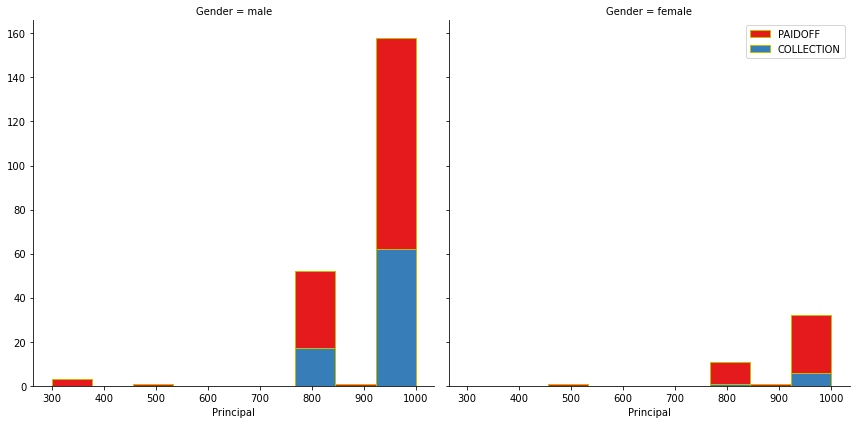

In [9]:

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6 )
g.map(plt.hist, 'Principal', bins=bins, ec="y")

g.axes[-1].legend()
plt.show()

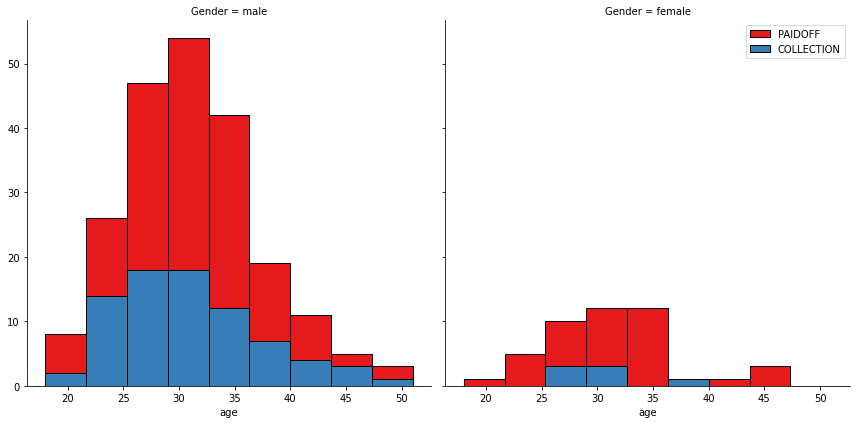

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2,height=6)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


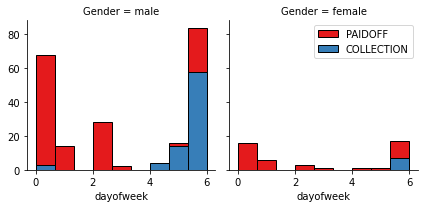

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [13]:
df.weekend.value_counts()

1    205
0    141
Name: weekend, dtype: int64

## Convert Categorical features to numerical values


Lets look at gender:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [17]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [18]:
#df.education[df.education == 'Master or Above']
df.drop(labels=[50,293], axis = 0 ,inplace= True)



In [19]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [20]:
df.groupby(['terms'])['loan_status'].value_counts(normalize=True)

terms  loan_status
7      PAIDOFF        1.000000
15     PAIDOFF        0.773973
       COLLECTION     0.226027
30     PAIDOFF        0.717391
       COLLECTION     0.282609
Name: loan_status, dtype: float64

In [21]:
Mapping = {'High School or Below': 1 ,'college': 2, 'Bechalor':3}
df = df.replace({'education': Mapping})

In [22]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,1,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,3,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,2,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,2,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,2,0,4,1


### Feature selection


Lets defind feature sets, X:


In [23]:
X = df[['Principal', 'terms', 'age', 'Gender', 'education','weekend']].values.astype(float)
X[0:5]

array([[1000.,   30.,   45.,    0.,    1.,    0.],
       [1000.,   30.,   33.,    1.,    3.,    0.],
       [1000.,   15.,   27.,    0.,    2.,    0.],
       [1000.,   30.,   28.,    1.,    2.,    1.],
       [1000.,   30.,   29.,    0.,    2.,    1.]])

In [24]:
df.shape

(344, 12)

What are our lables?


In [25]:
y = df[['loan_status']].values
y[0:5]

array([['PAIDOFF'],
       ['PAIDOFF'],
       ['PAIDOFF'],
       ['PAIDOFF'],
       ['PAIDOFF']], dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [26]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51345952,  0.91494265,  2.37885075, -0.42199786, -1.0048238 ,
        -1.19988179],
       [ 0.51345952,  0.91494265,  0.35995768,  2.36968028,  1.91213305,
        -1.19988179],
       [ 0.51345952, -0.96447776, -0.64948885, -0.42199786,  0.45365463,
        -1.19988179],
       [ 0.51345952,  0.91494265, -0.48124777,  2.36968028,  0.45365463,
         0.83341543],
       [ 0.51345952,  0.91494265, -0.31300668, -0.42199786,  0.45365463,
         0.83341543]])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y ,test_size=0.20)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (275, 6) (275, 1)
Test set: (69, 6) (69, 1)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn import metrics

In [29]:
k=13
m1 = KNN(n_neighbors = k ).fit(x_train,y_train)
m1

<ipython-input-29-90bd8f66db2f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  m1 = KNN(n_neighbors = k ).fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=13)

In [30]:
out = m1.predict(x_test)
out[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION'],
      dtype=object)

In [31]:
print("Train set Accuracy:", metrics.accuracy_score(y_train, m1.predict(x_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, out))

Train set Accuracy: 0.7963636363636364
Test set Accuracy: 0.6956521739130435


In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    m1 = KNN(n_neighbors = n).fit(x_train,y_train)
    out=m1.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, out)

    
    std_acc[n-1]=np.std(out==y_test)/np.sqrt(out.shape[0])

<ipython-input-37-52ce255ffabc>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  m1 = KNN(n_neighbors = n).fit(x_train,y_train)
<ipython-input-37-52ce255ffabc>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  m1 = KNN(n_neighbors = n).fit(x_train,y_train)
<ipython-input-37-52ce255ffabc>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  m1 = KNN(n_neighbors = n).fit(x_train,y_train)
<ipython-input-37-52ce255ffabc>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  m1 = KNN(n_neighbors = n).fit(x_train,y_train)
<ipython-input-37-52ce255ffabc>:8: DataC

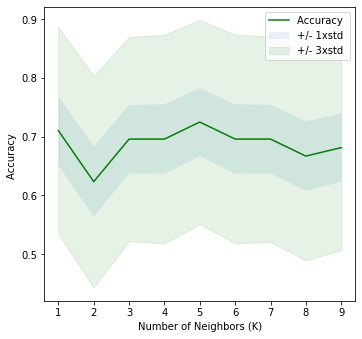

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.gcf().set_size_inches(5,5)
plt.show()

In [39]:
print( "The best accuracy is", mean_acc.max(), "for k=", mean_acc.argmax()+1) 

The best accuracy is 0.7246376811594203 for k= 5


In [40]:
k=5
m1 = KNN(n_neighbors = k ).fit(x_train,y_train)
m1

<ipython-input-40-b1a1d5c89060>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  m1 = KNN(n_neighbors = k ).fit(x_train,y_train)


KNeighborsClassifier()

In [41]:
out1 = m1.predict(x_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, out1))


Test set Accuracy:  0.7246376811594203


# Decision Tree


In [73]:
from sklearn.tree import DecisionTreeClassifier
m4 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
m4.fit(x_train,y_train)
m4

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [74]:
out4_dt = m4.predict(x_test)


In [75]:
m4.score(x_test,y_test)

0.7536231884057971

# Support Vector Machine


In [68]:
from sklearn import svm
m3 = svm.SVC()
m3.fit(x_train, y_train)

C:\Users\Kumar Shivam\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [71]:
out_svm = m3.predict(x_test)


In [72]:
m3.score(x_test,y_test)

0.7101449275362319

# Logistic Regression


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
m2 = LogisticRegression()

In [56]:
m2 = LogisticRegression(C=0.01 ,solver='newton-cg').fit(x_train,y_train)

C:\Users\Kumar Shivam\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
out2 = m2.predict(x_test)

In [59]:
m2.score(x_test,y_test)

0.7536231884057971

In [58]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, out2))

Test set Accuracy:  0.7536231884057971


In [64]:
out_ext = m2.predict_proba(x_test)


# Model Evaluation using Test set


In [42]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [43]:
url_tst= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'

### Load Test set for evaluation


In [44]:
test_df = pd.read_csv(url_tst)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## Data Procressing

In [45]:
Mapping = {'High School or Below': 1 ,'college': 2, 'Bechalor':3 , 'Master or Above': 4}
test_df = test_df.replace({'education': Mapping})

In [46]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [47]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [48]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [49]:
test = test_df[['Principal','terms','age','education','Gender','weekend']].values


In [50]:
test_x = preprocessing.StandardScaler().fit(test).transform(test.astype(float))


In [51]:
test_y = test_df[['loan_status']].values


## Models Score

In [52]:
knn = m1.predict(test_x)
print("Test set Accuracy: ", metrics.accuracy_score(test_y, knn))
print("KNN F1-score: %.2f" % f1_score(test_y, knn, average='weighted') )
print("the Jaccard Score:", jaccard_score(test_y,knn,pos_label = "PAIDOFF"))

Test set Accuracy:  0.7407407407407407
KNN F1-score: 0.73
the Jaccard Score: 0.7142857142857143


In [66]:
Logreg = m2.predict(test_x)
out_ext_proba = m2.predict_proba(test_x)
print("Test set Accuracy: ", metrics.accuracy_score(test_y, Logreg))
print("Logreg F1-score: %.2f" % f1_score(test_y, Logreg, average='weighted') )
print("the Jaccard Score:", jaccard_score(test_y,Logreg,pos_label = "PAIDOFF"))
print("LR LogLoss: %.2f" % log_loss(test_y, out_ext_proba))

Test set Accuracy:  0.7407407407407407
Logreg F1-score: 0.63
the Jaccard Score: 0.7407407407407407
LR LogLoss: 0.51


In [84]:
#dt
out_dt_final = m4.predict(test_x)
print("Test set Accuracy: ", metrics.accuracy_score(test_y, out_dt_final))
print("DT Jaccard index: %.2f" % jaccard_score(test_y, out_dt_final,pos_label = "PAIDOFF"))
print("DT F1-score: %.2f" % f1_score(test_y, out_dt_final, average='weighted') )

Test set Accuracy:  0.7407407407407407
DT Jaccard index: 0.74
DT F1-score: 0.63


In [83]:
#svm
svm_out = m3.predict(test_x)
print("Test set Accuracy: ", metrics.accuracy_score(test_y, svm_out))
print("svm Jaccard index: %.2f" % jaccard_score(test_y, svm_out,pos_label = "PAIDOFF"))
print("svm F1-score: %.2f" % f1_score(test_y, svm_out, average='weighted') )

Test set Accuracy:  0.7592592592592593
svm Jaccard index: 0.75
svm F1-score: 0.67


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.73    | 0.66     | NA      |
| Decision Tree      | 0.74    | 0.63     | NA      |
| SVM                | 0.75    | 0.67     | NA      |
| LogisticRegression | 0.74    | 0.63     | 0.51    |
